In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [2]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1, 1)

In [3]:
X

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [4]:
Y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [5]:
class XOR(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        # delegating the function call to the parent class, which is nn.Module here
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        x = self.lin2(x)
        return x

In [6]:
model = XOR()

In [7]:
for m in model.modules():
    print(m)

XOR(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=2, bias=True)
Linear(in_features=2, out_features=1, bias=True)


In [8]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # using a normal distribution to initialize the weight tensor
            m.weight.data.normal_(0, 1)

weights_init(model)

In [9]:
loss_func = nn.MSELoss()

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [11]:
epochs = 2001
steps = X.size(0)

for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)

        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {}, Loss: {}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 1.1347259283065796, 
Epoch: 500, Loss: 0.5137546062469482, 
Epoch: 1000, Loss: 0.004323376342654228, 
Epoch: 1500, Loss: 0.32353028655052185, 
Epoch: 2000, Loss: 0.319805771112442, 


In [12]:
model_params = list(model.parameters())

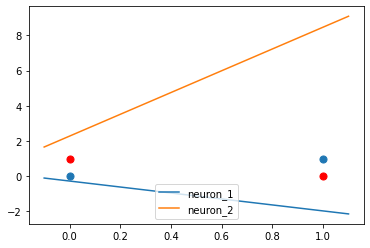

In [13]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()